# Deeplearning N Network Based Recommandation System on Yelp Data by Ben Niu(CU INFO Science)

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Data Processing

##### Load in Review data 

In [3]:
review = []
for line in open('review.json', 'r'):
    review.append(json.loads(line))

In [4]:
business_info = []
for line in open('business.json', 'r'):
    business_info.append(json.loads(line))

In [5]:
user_df = pd.read_csv('user.csv',names=['user id','# of funny votes','# of useful votes',' # of cool votes',' avg rating',' total review count'])
business_df = pd.read_csv('business.csv',header = None)

In [6]:
user_df.head()

,user id,# of funny votes,# of useful votes,# of cool votes,avg rating,total review count
0,14443,30,45,36,3.79,19
1,17782,5,24,9,3.90,10
2,13295,2,24,0,4.23,22
3,15187,0,7,0,4.00,9
4,16016,13,21,5,3.62,16


In [7]:
business_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4584,1,4,5,6.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4222,1,4,10,11.0,12.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4646,1,4,15,16.0,17.0,14.0,18.0,19.0,20.0,21.0,NaN,NaN,NaN
3,4137,1,4,22,23.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1100,1,4,15,24.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
review[0]

{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'date': '2011-01-26',
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It wa

In [9]:
user_business_info = []
for i in review:
    user_business_info.append([i['user_id'],i['business_id'],i['stars']])

In [10]:
user_business_info[0]

['rLtl8ZkDX5vH5nAx9C3q5Q', '9yKzy9PApeiPPOUJEtnvkg', 5]

In [11]:
np.array(user_business_info).shape

(141454, 3)

In [12]:
def get_business_id(search_business_token):        
    df = pd.read_csv('business-lookup.csv',header = None)
    return df[df[1]==search_business_token][0].item()

In [13]:
get_business_id('FuykdWajbSDj0hBY5DIuZQ')

3998

In [14]:
def get_business_token(business_id):
    df = pd.read_csv('business-lookup.csv',header = None)
    return df[df[0]==business_id][1].item()

In [15]:
get_business_token(3998)

'FuykdWajbSDj0hBY5DIuZQ'

In [16]:
def get_user_id(search_user_token):
    df = pd.read_csv('user-lookup.csv',header=None)
    return df[df[1]==search_user_token][0].item()

In [17]:
get_user_id('rLtl8ZkDX5vH5nAx9C3q5Q')

10000

### Extract userid and businessid and other features to a list,array or pandas

userinfo = []
for i in user_business_info: # Here to change the total size of dataset in training batch 
    userinfo.append([get_user_id(i[0]),get_business_id(i[1]),i[2]])

userinfo = np.asarray(userinfo)
userinfo

### Asign each column an unique number in the range of row length 

user_df = pd.DataFrame(userinfo,columns = ['userId','itemId','Rating'])
user_df['idxuserId'] = user_df['userId'].astype('category').cat.codes.values
user_df['idxitemId'] = user_df['itemId'].astype('category').cat.codes.values

user_df.head()

user_df.to_csv('IndexedID')

In [18]:
user_df = pd.read_csv('IndexedID')
user_df = user_df.drop(['Unnamed: 0'], axis=1)
user_df.head()

,userId,itemId,Rating,idxuserId,idxitemId
0,10000,0,5,0,0
1,10001,1,5,1,1
2,10002,2,5,2,2
3,10003,3,4,3,3
4,10004,4,5,4,4


In [19]:
from sklearn.model_selection import train_test_split
trainkeras, testkeras = train_test_split(user_df, test_size=0.05)

In [19]:
trainkeras.head()

,userId,itemId,Rating,idxuserId,idxitemId
37182,10653,4292,4,653,4292
53911,16768,34,4,6768,34
118199,12443,1541,3,2443,1541
55516,10940,688,5,940,688
132871,10791,4953,4,791,4953


import csv


with open('people1.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(row)

csvFile.close()

## Train Model

In [1]:
import keras
from IPython.display import SVG,Image
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import merge
from keras.layers import Input, Embedding, Dot, Reshape, Dense
from keras.models import model_from_json
from keras.utils import plot_model
from keras import losses
import keras_metrics as km

Using TensorFlow backend.


movie_input = keras.layers.Input(shape=[1],name='Business')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Bussiness-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenBusiness')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

#prod = keras.layers.Merge([movie_vec, user_vec], mode='dot',name='DotProduct')
prod = Dot(name = 'dot_product', normalize = True, axes = 1)([movie_vec, user_vec])
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

In [20]:
n_users, n_movies = len(user_df['idxuserId']), len(user_df['idxitemId'])
n_latent_factors = 5

In [26]:
n_latent_factors_user = 5
n_latent_factors_movie = 8

bs_input = keras.layers.Input(shape=[1],name='BusinessID')
bs_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Business-Embedding')(bs_input)
bs_vec = keras.layers.Flatten(name='FlattenBusiness')(bs_embedding)
bs_vec = keras.layers.Dropout(0.2)(bs_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.Concatenate(axis=-1)([bs_vec, user_vec])
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([user_input, bs_input], result)
model.compile(optimizer=adam,loss= 'mean_squared_error', metrics=[km.precision(), km.recall()])

In [27]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
BusinessID (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Business-Embedding (Embedding)  (None, 1, 8)         1131640     BusinessID[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         707275      User[0][0]                       
__________________________________________________________________________________________________
FlattenBus

In [28]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,rankdir='HB')

In [29]:
#SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [31]:
Userembedding = model.fit([user_df['idxuserId'], user_df['idxitemId']], user_df['Rating'],validation_split=0.1, epochs=50, verbose=1)

Train on 127308 samples, validate on 14146 samples
Epoch 1/50
127308/127308 [==============================] - 56s 443us/step - loss: 1.1220 - precision: 3.8197 - recall: 3.8271 - val_loss: 1.0740 - val_precision: 3.8130 - val_recall: 3.8823
Epoch 2/50
127308/127308 [==============================] - 56s 442us/step - loss: 1.0097 - precision: 3.8442 - recall: 3.8467 - val_loss: 1.0654 - val_precision: 3.8309 - val_recall: 3.9457
Epoch 3/50
127308/127308 [==============================] - 56s 443us/step - loss: 0.9759 - precision: 3.8517 - recall: 3.8540 - val_loss: 1.0409 - val_precision: 3.8402 - val_recall: 3.8034
Epoch 4/50
127308/127308 [==============================] - 56s 443us/step - loss: 0.9544 - precision: 3.8558 - recall: 3.8506 - val_loss: 1.0393 - val_precision: 3.8315 - val_recall: 3.8556
Epoch 5/50
127308/127308 [==============================] - 57s 444us/step - loss: 0.9387 - precision: 3.8591 - recall: 3.8441 - val_loss: 1.0400 - val_precision: 3.8364 - val_recall: 3

127308/127308 [==============================] - 56s 437us/step - loss: 0.8624 - precision: 3.8786 - recall: 3.8898 - val_loss: 1.0905 - val_precision: 3.8600 - val_recall: 3.9523
Epoch 44/50
127308/127308 [==============================] - 56s 438us/step - loss: 0.8579 - precision: 3.8807 - recall: 3.8894 - val_loss: 1.0602 - val_precision: 3.8469 - val_recall: 3.9020
Epoch 45/50
127308/127308 [==============================] - 56s 437us/step - loss: 0.8592 - precision: 3.8811 - recall: 3.8895 - val_loss: 1.0639 - val_precision: 3.8462 - val_recall: 3.8007
Epoch 46/50
127308/127308 [==============================] - 56s 438us/step - loss: 0.8543 - precision: 3.8819 - recall: 3.8881 - val_loss: 1.0740 - val_precision: 3.8562 - val_recall: 3.8993
Epoch 47/50
127308/127308 [==============================] - 56s 437us/step - loss: 0.8518 - precision: 3.8824 - recall: 3.8927 - val_loss: 1.0818 - val_precision: 3.8533 - val_recall: 4.0257
Epoch 48/50
127308/127308 [=========================

Text(0, 0.5, 'Train Error')

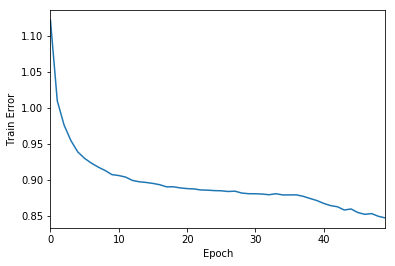

In [32]:
pd.Series(Userembedding.history['loss']).plot()#logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [33]:
Embedding_loss = pd.DataFrame(Userembedding.history['loss'], columns=['mean'])
Embedding_loss.mean()

mean    0.894758
dtype: float64

In [34]:
y_pred = np.round(model.predict([testkeras['idxuserId'], testkeras['idxitemId']]),0)
y_true = np.array(testkeras['Rating'])

In [35]:
a = keras.losses.mean_squared_error(y_true, y_pred)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_true, y_pred)

0.6424430934539799

# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
#score = loaded_model.evaluate(y_pred, y_true, verbose=1)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

## Analysis

In [37]:
# Extract embeddings
user_layer = model.get_layer('User-Embedding')
user_weights = user_layer.get_weights()[0]
user_weights.shape

(141455, 5)

In [38]:
np.savetxt('user_weights.tsv', user_weights,delimiter='\t') 

#### We need to normalize the embeddings so that the dot product between two embeddings becomes the cosine similarity.

In [39]:
user_weights = user_weights / np.linalg.norm(user_weights, axis = 1).reshape((-1, 1))
user_weights[0]
np.sum(np.square(user_weights[0]))

1.0

In [40]:
user_weights

array([[ 0.4710172 ,  0.41563463,  0.3737836 , -0.49730328, -0.46729642],
       [ 0.575923  ,  0.38835007, -0.10286891, -0.52473325, -0.48121718],
       [-0.4891263 , -0.4285059 ,  0.55828303,  0.20793061,  0.4714054 ],
       ...,
       [-0.60975426,  0.08551025,  0.3416863 , -0.37499908,  0.60292107],
       [-0.2690084 , -0.31127974, -0.64068854,  0.5027954 , -0.40921196],
       [-0.61638975, -0.4526669 , -0.55808556,  0.12722096, -0.2958235 ]],
      dtype=float32)

### Top 5 closest Users

In [49]:
dists =np.dot(user_weights,user_weights[0]) # Calculate the similarity for first user in array
sorted_dists = np.argsort(dists) # sort the dists list return the least simlar user idx to closest 
sorted_dists[-5:] # Top 5 closest user'index

array([137853,  94385, 131016, 106697,      0], dtype=int64)

### The similarity of cloesest user to first user in array

In [34]:
dists[137853],dists[94385],dists[131016],dists[106697],dists[0]

(0.99588007, 0.9959849, 0.99621785, 0.99776953, 1.0)

In [44]:
#get user's id through user index
def get_user_id_from_idx(user_idx):
    return user_df[user_df['idxuserId']== user_idx].iloc[0][0].item()

In [42]:
get_user_id_from_idx(0)

10000

In [46]:
def get_useridx_from_userid(userid):
    return user_df[user_df['userId']== userid].iloc[0][3].item()

In [47]:
get_useridx_from_userid(10000)

0

### Getting recommended businessid by closest user_index which ratings are greater than 3 

In [41]:
#get recommended_businessid by user_index
def get_recommended_businessid(user_idx,rating =3):
    ''' Given a user index return the businessid which rating greater than 3
        otherwise return rating smaller than 3'''
    a = np.array(user_df[user_df['idxuserId']== user_idx]) 
    if len(a[np.where(a[:,2]>=rating)][:,1]) != 0: # Get userid by user index than return the businessid which are greater than raing
        return a[np.where(a[:,2]>=rating)][:,1]
    elif len(a[np.where(a[:,2]>=rating)][:,1]) == 0: # if no business' rating greater than 3 return other business
        print("No business rating Greater than 3, but here are users that simlilary to you disliked business")
        return a[np.where(a[:,2]<=rating)][:,1]
                  

In [42]:
def get_business_info(business_id):
    '''Get business's information by business Id'''
    buslist = []
    if isinstance(business_id, (list, tuple, np.ndarray)) == True:
        for i in business_id:
            print(i,business_id)
            for a in range(0,len(business_info)):
                if business_info[a]['business_id']==get_business_token(i):
                    buslist.append(business_info[a])
        return buslist
    else:
        for i in range(0,len(business_info)):
            if business_info[i]['business_id']==get_business_token(business_id):
                return business_info[i]

### Get Top Five recommanded business's infomation for user 10000

In [49]:
get_business_info(get_recommended_businessid(get_useridx_from_userid(10000), rating =5)[:5])

0 [   0 2583 2263 1705  707]
2583 [   0 2583 2263 1705  707]
2263 [   0 2583 2263 1705  707]
1705 [   0 2583 2263 1705  707]
707 [   0 2583 2263 1705  707]


[{'business_id': '9yKzy9PApeiPPOUJEtnvkg',
  'full_address': '6106 S 32nd St\nPhoenix, AZ 85042',
  'open': True,
  'categories': ['Breakfast & Brunch', 'Restaurants'],
  'city': 'Phoenix',
  'review_count': 116,
  'name': 'Morning Glory Cafe',
  'neighborhoods': [],
  'longitude': -112.012504,
  'state': 'AZ',
  'stars': 4.0,
  'latitude': 33.390792,
  'type': 'business'},
 {'business_id': '04Jrd2zSzwHwmBqdKQDmIw',
  'full_address': '929 N Dobson Rd\nSte 102\nMesa, AZ 85201',
  'open': True,
  'categories': ['Japanese', 'Restaurants'],
  'city': 'Mesa',
  'review_count': 11,
  'name': 'Yogis Grill',
  'neighborhoods': [],
  'longitude': -111.8742667,
  'state': 'AZ',
  'stars': 3.5,
  'latitude': 33.4292474,
  'type': 'business'},
 {'business_id': '-3xbryp44xhpN4BohxXDdQ',
  'full_address': '21001 N Tatum Blvd\nPhoenix, AZ 85050',
  'open': True,
  'categories': ['Bars', 'Steakhouses', 'Nightlife', 'Restaurants'],
  'city': 'Phoenix',
  'review_count': 65,
  'name': 'The Keg Steakhous

In [ ]:
#from FindSimlar import find_similar

In [ ]:
#find_similar(10000, user_weights,n=5)

## Evaluation 

In [50]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Predictor, Recommender
from lenskit.algorithms.user_knn import UserUser
from lenskit.algorithms.item_knn import ItemItem
from lenskit.algorithms.basic import UnratedItemCandidateSelector
from lenskit.metrics.predict import rmse

In [51]:
user_df.head()

,userId,itemId,Rating,idxuserId,idxitemId
0,10000,0,5,0,0
1,10001,1,5,1,1
2,10002,2,5,2,2
3,10003,3,4,3,3
4,10004,4,5,4,4


In [52]:
ratings_df = user_df[['idxuserId','idxitemId','Rating']]
ratings_df.columns = ('user', 'item', 'rating')
len(ratings_df[ratings_df['user']==521]['item'].unique())

251

In [53]:
ratings_df = ratings_df.drop_duplicates(subset = ['user','item'],keep ='first')
ratings_df.head()

,user,item,rating
0,0,0,5
1,1,1,5
2,2,2,5
3,3,3,4
4,4,4,5


In [54]:
user_knn = UserUser(nnbrs=5, min_sim=0.1, center=True, aggregate='weighted-average')
item_knn = ItemItem(nnbrs=5, min_sim=0.1, center=True, aggregate='weighted-average')

In [55]:
def eval_recs(aname, fold, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    
    users = test.user.unique()
    recs = batch.recommend(fittable, users, 10)
    # add the algorithm
    recs['Algorithm'] = aname
    recs['Fold'] = fold
    return recs

In [56]:
def eval_preds(aname, fold, algo, train, test):
    fittable = util.clone(algo)
    fittable.fit(train)
    
    preds = batch.predict(fittable, test)
    preds['Algorithm'] = aname
    preds['Fold'] = fold
    return preds

In [57]:
np.random.seed(20190303)

all_preds = []
fold = 1
# HOMEWORK 3 TODO
# Implement 5-fold cross-validation with user-based splitting
# Call eval_preds for each algorithm, each fold
# Results should be appended to all_preds
#test_data = []

for train, test in xf.partition_users(ratings_df[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):

    #test_data.append(test)
    all_preds.append(eval_preds('UserKNN',fold,user_knn, train, test))
    all_preds.append(eval_preds('ItemKNN',fold,item_knn, train, test))

    
    print("Completed fold {}".format(fold))
    fold += 1

D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:89: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:153: RuntimeWarning: invalid value encountered in greater_equal
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:159: RuntimeWarning: invalid value encountered in greater_equal
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:153: RuntimeWarning: invalid value encountered in greater_equal
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:159: RuntimeWarning: invalid value encountered in greater_equal


Completed fold 1


D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:89: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:153: RuntimeWarning: invalid value encountered in greater_equal
D:\Anaconda3\envs\tensorflow\lib\site-packages\lenskit-0.6.1-py3.7.egg\lenskit\algorithms\user_knn.py:159: RuntimeWarning: invalid value encountered in greater_equal


Completed fold 2
Completed fold 3
Completed fold 4
Completed fold 5


In [58]:
#for train, test in xf.partition_users(ratings_df[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    

In [59]:
all_preds = pd.concat(all_preds, ignore_index=True)
all_preds.head()

,user,item,rating,prediction,Algorithm,Fold
0,2,3177,1,NaN,UserKNN,1
1,2,799,2,NaN,UserKNN,1
2,3,98,4,4.276499,UserKNN,1
3,3,139,5,3.879785,UserKNN,1
4,4,4631,3,NaN,UserKNN,1


In [60]:
Algo_rmse = all_preds.groupby(['Algorithm','Fold']).apply(lambda all_preds: rmse(all_preds.prediction, all_preds.rating))
Algo_rmse

Algorithm  Fold
ItemKNN    1       1.230239
           2       1.245542
           3       1.185197
           4       1.204711
           5       1.212340
UserKNN    1       1.175262
           2       1.241259
           3       1.209075
           4       1.218906
           5       1.221485
dtype: float64

Text(0, 0.5, 'Mean RMSE over 5 fold')

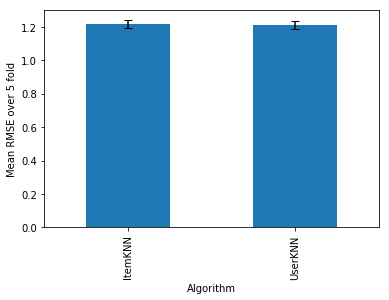

In [80]:

mean_std = Algo_rmse.groupby('Algorithm').agg([np.mean, np.std])
mean_std['mean'].plot.bar(yerr=mean_std['std'], capsize=4).set_ylabel('Mean RMSE over 5 fold')
#plt.ylabel('Mean RMSE over 5 fold')

### Compare Deeplearning Model RMSE to others

Text(0, 0.5, 'Mean RMSE')

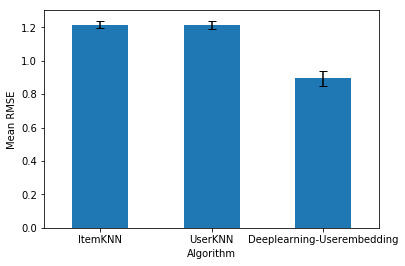

In [83]:

mean_std.loc['Deeplearning-Userembedding']=[Embedding_loss.mean().item(),float(np.std(Embedding_loss).values)]
mean_std['mean'].plot.bar(yerr=mean_std['std'], rot=0,capsize=4).set_ylabel('Mean RMSE')

In [70]:
np.random.seed(20190317)
algo_names = list(('UserKNN', 'ItemKNN'))
all_recs1 = []
test_data1 = []
fold = 0
for train, test in xf.partition_users(ratings_df, 5, xf.SampleFrac(0.2)):
# 5 fold cross-validation
    test_data1.append(test)
    for i, algo in enumerate((user_knn,item_knn)):
        all_recs1.append(eval_recs(algo_names[i], fold, algo, train, test))
    print("Completed fold {}".format(fold))
    fold += 1

Completed fold 0
Completed fold 1
Completed fold 2
Completed fold 3
Completed fold 4


In [71]:
all_recs1 = pd.concat(all_recs1, ignore_index=True)
test_data1 = pd.concat(test_data1, ignore_index=True)

In [72]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.precision)
byuser_results = all_recs1.groupby(['Algorithm', 'Fold']).apply(lambda df: rla.compute(df, test_data1))

In [84]:
eval_grouped = byuser_results.groupby(['Algorithm', 'Fold'])
eval_grouped_mean = eval_grouped.mean()
result_df = pd.DataFrame({'mean': eval_grouped_mean.groupby('Algorithm').mean()['precision'],
                        'std': eval_grouped_mean.groupby('Algorithm').std()['precision']})

In [85]:
result_df.loc['Deeplearning-Userembedding']=[np.mean(Userembedding.history['precision']),float(np.std(np.mean(Userembedding.history['precision'])))]

In [102]:
result_df['mean'] # Precision of three algorithm 

<bound method IndexOpsMixin.item of Algorithm
ItemKNN                       0.000932
UserKNN                       0.002313
Deeplearning-Userembedding    3.869177
Name: mean, dtype: float64>

Text(0, 0.5, 'precision@10')

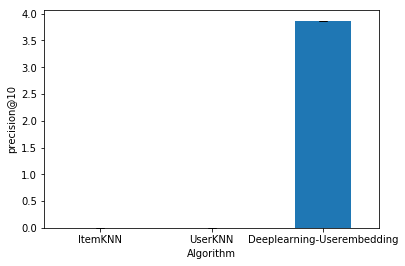

In [86]:
result_df['mean'].plot.bar(yerr=result_df['std'], rot = 0,capsize=4).set_ylabel('precision@10')